# Predicting Adenocarcinoma

This is an exercise for predicting whether a patient has adenocarcinoma (1) or not (0). It is a classification problem. 

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("/Users/jessicaparker/Desktop/Data/Coding Challenge/data.csv")

data

,gene1,gene2,gene3,gene4,gene5,proteinA,adenocarcinoma
0,-4.253070,1060.828274,0.723866,-183.193766,899.840296,absent,0
1,-9.394422,745.845012,1.177609,-348.189944,-320.521019,absent,1
2,-12.529502,1210.943422,0.362242,447.704411,643.489025,present,0
3,-8.676414,1339.463332,0.937266,397.341232,837.099109,absent,1
4,-2.462555,-148.879229,1.509619,404.786878,-1356.039919,present,1
...,...,...,...,...,...,...,...
995,-8.367396,369.497263,-0.759674,56.265427,326.115137,present,0
996,-3.010149,NaN,0.465490,-17.559968,671.171655,absent,1
997,-6.669936,793.798406,1.042483,379.967222,-49719.196634,present,0
998,-12.606095,-431.566220,-1.522064,-67.756794,-866.565430,present,0


Just for the sake of curiosity, let's check and see how many people in out data set have adenocarcinoma.

## Exploration

In [2]:
data["adenocarcinoma"].value_counts()

1    656
0    344
Name: adenocarcinoma, dtype: int64

As we can see from the information above, quite a lot of these patients do have it - nearly 70%!

In [3]:
data.corr()

,gene1,gene2,gene3,gene4,gene5,adenocarcinoma
gene1,1.000000,-0.061801,-0.115256,0.056433,0.008912,0.005616
gene2,-0.061801,1.000000,0.029620,-0.001688,0.087897,0.096640
gene3,-0.115256,0.029620,1.000000,0.014839,-0.030150,0.581606
gene4,0.056433,-0.001688,0.014839,1.000000,0.033690,0.018529
gene5,0.008912,0.087897,-0.030150,0.033690,1.000000,-0.034971
adenocarcinoma,0.005616,0.096640,0.581606,0.018529,-0.034971,1.000000


Now, let's change the absent/present feature in a dummy variable to make things easier for us later on. 

In [4]:
data["proteinA"].replace("absent", 0, inplace = True)
data["proteinA"].replace("present", 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gene1           1000 non-null   float64
 1   gene2           823 non-null    float64
 2   gene3           1000 non-null   float64
 3   gene4           1000 non-null   float64
 4   gene5           1000 non-null   float64
 5   proteinA        1000 non-null   int64  
 6   adenocarcinoma  1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


We can see here that in gene2 there are 177 missing values. Let's impute them. 

In [6]:
data["gene2"].median(), data["gene2"].mean()

(1031.3801293241488, 708.2113858100753)

We should use the median to impute the values since it varies greatly from the mean which means that out feature has a lot of outliers. 

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "median")
imp.fit(data[["gene2"]])
imputed = imp.transform(data[["gene2"]])
imputed = pd.DataFrame(imputed)
data["gene2"] = imputed

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gene1           1000 non-null   float64
 1   gene2           1000 non-null   float64
 2   gene3           1000 non-null   float64
 3   gene4           1000 non-null   float64
 4   gene5           1000 non-null   float64
 5   proteinA        1000 non-null   int64  
 6   adenocarcinoma  1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


We can now see that out data set has no more missing values. 

<AxesSubplot:xlabel='gene3'>

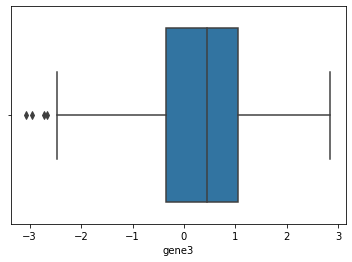

In [8]:
sns.boxplot(data["gene3"])

<AxesSubplot:xlabel='gene5'>

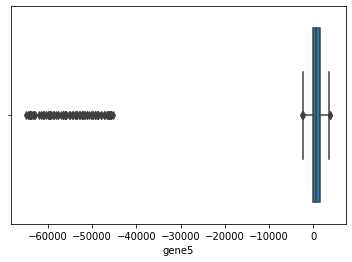

In [9]:
sns.boxplot(data["gene5"])

Since we can see that these features have a lot of outliers, let's use a Robust Scaler. However, first we should split out data into a test and training set. 

In [10]:
data.columns

Index(['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'proteinA',
       'adenocarcinoma'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

y = data["adenocarcinoma"]
X = data[['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'proteinA']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gene1           1000 non-null   float64
 1   gene2           1000 non-null   float64
 2   gene3           1000 non-null   float64
 3   gene4           1000 non-null   float64
 4   gene5           1000 non-null   float64
 5   proteinA        1000 non-null   int64  
 6   adenocarcinoma  1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [13]:
from sklearn.preprocessing import RobustScaler


robustscaler = RobustScaler().fit(X_train)

X_train[:][['gene2','gene3']] = robustscaler.fit_transform(X_train[['gene2','gene3']])
X_test[:][['gene2','gene3']] = robustscaler.transform(X_test[['gene2','gene3']])

# scaled_test = X_test


Now, we are ready to buld out logistic regression model. 

## Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
clf = log_model.fit(X_train, y_train)
clf.score(X_test, y_test)


/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8

In [18]:
clf.predict_proba(X_test.iloc[0:15])

array([[0.07244887, 0.92755113],
       [0.14918803, 0.85081197],
       [0.80072044, 0.19927956],
       [0.22074394, 0.77925606],
       [0.75163276, 0.24836724],
       [0.24981178, 0.75018822],
       [0.07387676, 0.92612324],
       [0.4208055 , 0.5791945 ],
       [0.14351328, 0.85648672],
       [0.06970404, 0.93029596],
       [0.30814635, 0.69185365],
       [0.52488557, 0.47511443],
       [0.32319186, 0.67680814],
       [0.03576137, 0.96423863],
       [0.65955379, 0.34044621]])

Above we can see the probability that the 15  patients in our test set will have adenocarcinoma and chances are that all of them except 3 do!

In [22]:
pred = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68       106
           1       0.81      0.90      0.85       194

    accuracy                           0.80       300
   macro avg       0.79      0.76      0.77       300
weighted avg       0.80      0.80      0.79       300



Since we do not care as much about false positivies and would like to catch as many people who have the illness, then we want to aim for a high recall score. 

Now, let's build another model so see if we can get more accurate predictions.

### RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8533333333333334

In [ ]:
This model gives us 85 percent accuracy!

In [24]:
pred = forest.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       106
           1       0.85      0.94      0.89       194

    accuracy                           0.85       300
   macro avg       0.86      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300



We can see here that our recall score has also increased so out of the two simple models, the random forest is the safer bet. 

In [17]:
forest.predict_proba(X_test.iloc[0:15])

array([[0.03, 0.97],
       [0.17, 0.83],
       [0.96, 0.04],
       [0.14, 0.86],
       [0.75, 0.25],
       [0.43, 0.57],
       [0.05, 0.95],
       [0.04, 0.96],
       [0.38, 0.62],
       [0.02, 0.98],
       [0.43, 0.57],
       [0.14, 0.86],
       [0.18, 0.82],
       [0.02, 0.98],
       [0.94, 0.06]])

When we look for the probability that the same patients will have adenocarcinoma, we find that the the same three patients have a low risk of having adenocarcinoma.  

## Further possible actions

Some steps that could be taken are the following:

    1. We can ask the person who collected the data why there are so many outliers in some of the gene features. 
    2. We can ue se a gridsearch CV to improve our RandomForest model. 
    3. Focus on generating new features that can improve our predictions. What are some other potential features that can cause 
       adenocarcinoma?

In [ ]:
## Scale after you split and, print classification report, further steps. 